In [1]:
import pandas as pd

# cast.csv

In [2]:
c = pd.read_csv('C:/Users/dell/Documents/ML Training/OneDrive-2024-06-20/cast.csv')
c.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


## Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [3]:
c1 = c
c1 = c1[(c1.character == 'Superman') | (c1.character == 'Batman')]
c1 = c1.groupby(['year' , 'character']).size()
c1 = c1.unstack()
c1 = c1.fillna(0)
c1.head()

character,Batman,Superman
year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1948,0.0,1.0
1949,2.0,0.0


In [4]:
print("Superman Years:")
c1[c1.Superman > c1.Batman].index

Superman Years:


Int64Index([1948, 1950, 1951, 1954, 1955, 1973, 1978, 1980, 1983, 1987, 2006], dtype='int64', name='year')

In [5]:
print("Number of Superman Year:")
len(c1[c1.Superman > c1.Batman])

Number of Superman Year:


11

In [6]:
# another way which is better
diff = c1.Superman - c1.Batman
print("Number of Superman Year:")
len(diff[diff > 0])

Number of Superman Year:


11

## How many years have been "Batman years", with more Batman characters than Superman characters?

In [7]:
print("Number of Batman Year:")
len(diff[diff < 0])

Number of Batman Year:


26

## Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [8]:
c2 = c
c2 = c2.groupby(['year' , 'type']).size()
c2 = c2.unstack('type')
c2 = c2.fillna(0)
c2

type,actor,actress
year,,
1894,2.0,1.0
1900,2.0,0.0
1905,1.0,0.0
1906,14.0,3.0
1907,5.0,0.0
...,...,...
2022,12.0,4.0
2023,2.0,0.0
2024,5.0,3.0


<AxesSubplot:xlabel='year'>

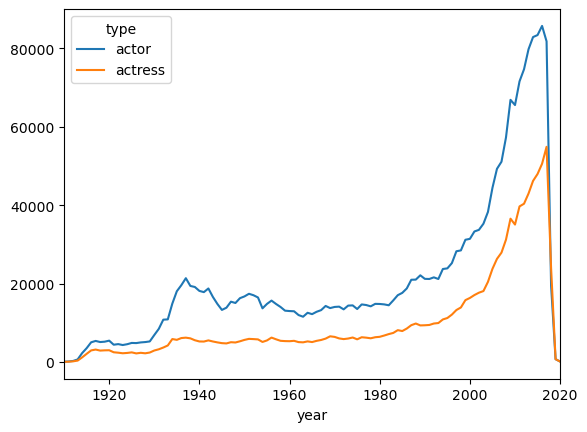

In [9]:
c2.plot(xlim = (1910 , 2020))

## Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year'>

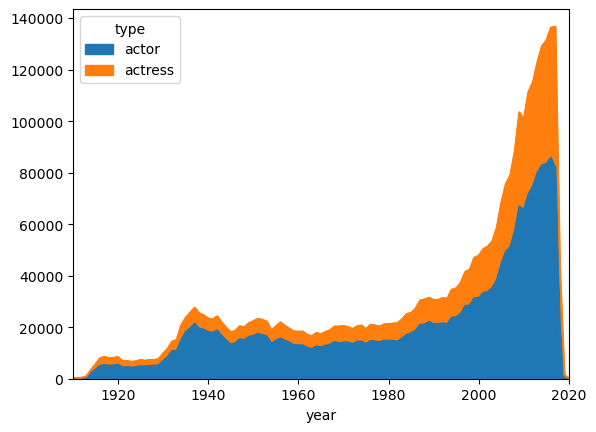

In [10]:
c2.plot(kind = "area" , xlim = (1910 , 2020))

## Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

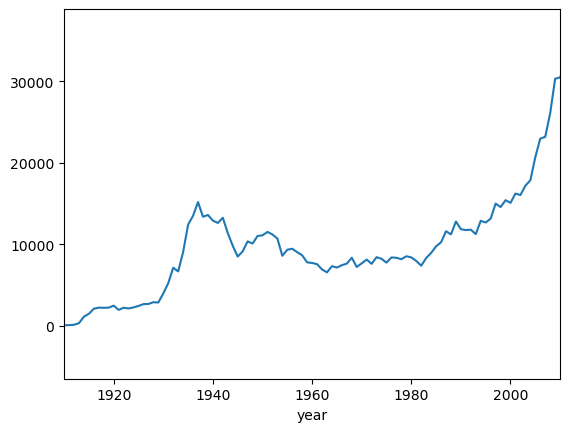

In [11]:
(c2.actor - c2.actress).fillna(0).plot(xlim = (1910 , 2010))

## Plot the fraction of roles that have been 'actor' roles each year in the history of film.

In [12]:
c3 = c
c3 = c3.groupby(['year' , 'type']).size()
c3 = c3.unstack('type')
c3 = c3.fillna(0)
cf = c3.actor / (c3.actor + c3.actress)
cf

year
1894    0.666667
1900    1.000000
1905    1.000000
1906    0.823529
1907    1.000000
          ...   
2022    0.750000
2023    1.000000
2024    0.625000
2025    0.555556
2115    0.666667
Length: 124, dtype: float64

<AxesSubplot:xlabel='year'>

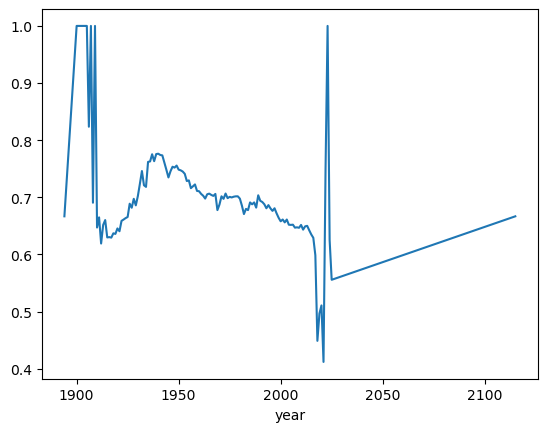

In [13]:
cf.plot()

## Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

In [19]:
c4 = c
c4 = c4[c4.n == 2]
c4 = c4.groupby(['year' , 'type']).size()
c4 = c4.unstack('type')
c4 = c4.fillna(0)
c4

type,actor,actress
year,,
1906,2.0,1.0
1907,1.0,0.0
1908,2.0,0.0
1910,2.0,2.0
1911,13.0,4.0
...,...,...
2016,1914.0,1561.0
2017,1678.0,1501.0
2018,294.0,471.0


In [20]:
f = (c4.actor / (c4.actor + c4.actress))
f

year
1906    0.666667
1907    1.000000
1908    1.000000
1910    0.500000
1911    0.764706
          ...   
2016    0.550791
2017    0.527839
2018    0.384314
2019    0.555556
2020    0.000000
Length: 114, dtype: float64

<AxesSubplot:xlabel='year'>

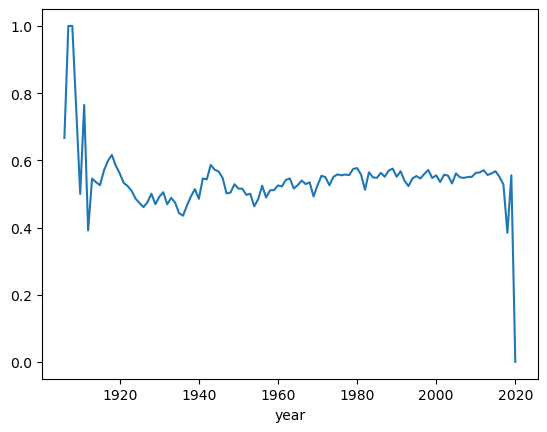

In [24]:
f.plot()

## Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

In [28]:
c5 = c
c5 = c5[(c5.n >=1 ) & (c5.n <= 3)]
c5 = c5.groupby(['year' , 'type' , 'n']).size()
c5 = c5.unstack('type')
c5 = c5.fillna(0)
c5

type      actor  actress
year n                  
1906 1.0    2.0      1.0
     2.0    2.0      1.0
     3.0    0.0      1.0
1907 1.0    1.0      0.0
     2.0    1.0      0.0
...         ...      ...
2019 1.0   11.0     16.0
     2.0   10.0      8.0
     3.0    6.0     11.0
2020 1.0    4.0      0.0
     2.0    0.0      1.0

[342 rows x 2 columns]

In [29]:
g = c5.actor / (c5.actor + c5.actress)
g

year  n  
1906  1.0    0.666667
      2.0    0.666667
      3.0    0.000000
1907  1.0    1.000000
      2.0    1.000000
               ...   
2019  1.0    0.407407
      2.0    0.555556
      3.0    0.352941
2020  1.0    1.000000
      2.0    0.000000
Length: 342, dtype: float64

In [31]:
g = g.unstack('n')
g

n,1.0,2.0,3.0
year,,,
1906,0.666667,0.666667,0.000000
1907,1.000000,1.000000,1.000000
1908,1.000000,1.000000,1.000000
1909,1.000000,NaN,NaN
1910,0.200000,0.500000,1.000000
...,...,...,...
2016,0.683784,0.550791,0.576256
2017,0.615499,0.527839,0.569120
2018,0.449312,0.384314,0.395023


<AxesSubplot:xlabel='year'>

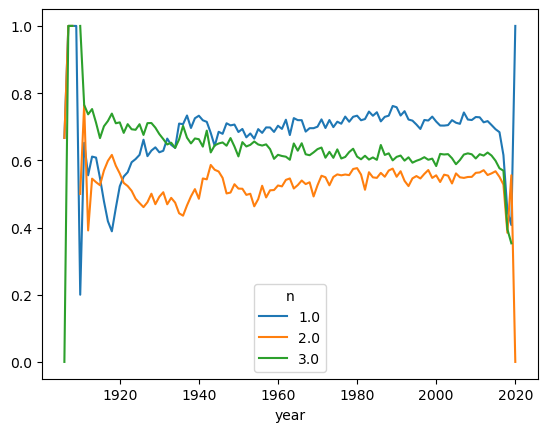

In [32]:
g.plot()

In [ ]:
# if we use c.fillna(0 , inplace = True) and c =we use c.fillna(0 , inplace = True) then c will be empty